## Support Vector Machine (SVM) - Support Vector Classification(SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
x = np.array([[1,3],[1,2],[1,1.5],[1.5,2],[2,3],[2.5,1.5],[2,1],[3,1],[3,2],[3.5,1],[3.5,3]])

In [3]:
x

array([[1. , 3. ],
       [1. , 2. ],
       [1. , 1.5],
       [1.5, 2. ],
       [2. , 3. ],
       [2.5, 1.5],
       [2. , 1. ],
       [3. , 1. ],
       [3. , 2. ],
       [3.5, 1. ],
       [3.5, 3. ]])

In [4]:
y = [0]*6 + [1]*5
# list of 6 zeros and 5 1s.

In [5]:
y

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [6]:
type(y)

list

In [7]:
x[:,0]

array([1. , 1. , 1. , 1.5, 2. , 2.5, 2. , 3. , 3. , 3.5, 3.5])

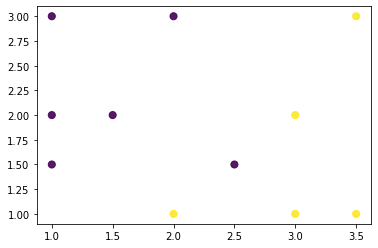

In [8]:
plt.scatter(x[:,0],x[:,1], c=y, s=50, alpha = 0.9)

In [9]:
from sklearn import svm

In [10]:
svc = svm.SVC(kernel='linear').fit(x,y)

In [11]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
X, Y = np.mgrid[0:4:200j, 0:4:200j]

In [13]:
Z = svc.decision_function(np.c_[X.ravel(), Y.ravel()])
# use decision_function() to plot the decision boundary

In [14]:
Z = Z.reshape(X.shape)

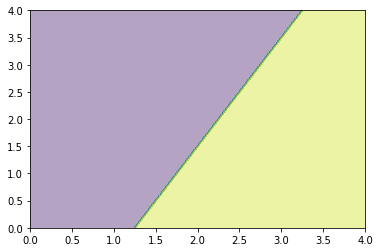

In [15]:
plt.contourf(X,Y,Z >0, alpha = 0.4)

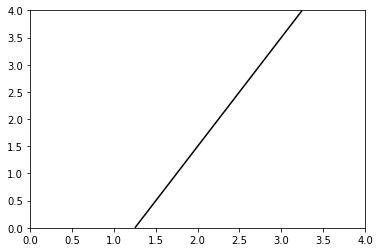

In [16]:
plt.contour(X,Y,Z, colors=['k'], linestyles =['-'], levels =[0])

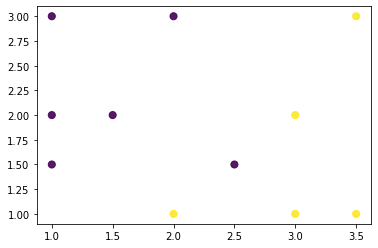

In [17]:
plt.scatter(x[:,0], x[:,1], c = y, s = 50, alpha=0.9)

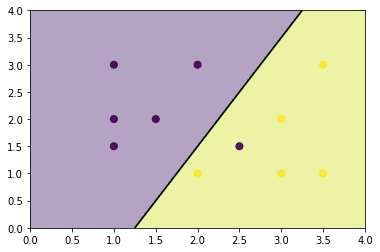

In [18]:
plt.contourf(X,Y,Z >0, alpha = 0.4)
plt.contour(X,Y,Z, colors=['k'], linestyles =['-'], levels =[0])
plt.scatter(x[:,0], x[:,1], c = y, s = 50, alpha=0.9)

In [19]:
svc.predict([[1.5, 2.5]])

array([0])

In [20]:
svc.predict([[2.5, 1]])

array([1])

## Lower Regularization

In [21]:
svc_cfac = svm.SVC(kernel='linear', C = 1).fit(x,y)
# default value of C is 1
# a small value of C means that the margin is calculated using many or all of the observations around the line of separation
# (greater regularization)
# a large value of C means that the margin is calculated on the observations near to the line separation
# (lower regularization)

In [22]:
Z_cfac = svc_cfac.decision_function(np.c_[X.ravel(), Y.ravel()])
Z_cfac = Z_cfac.reshape(X.shape)

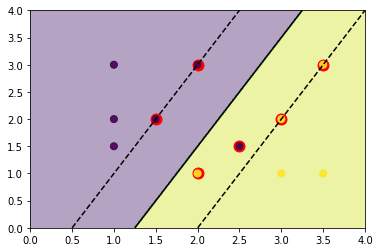

In [23]:
plt.contourf(X,Y,Z_cfac >0, alpha = 0.4)
plt.contour(X,Y,Z_cfac, colors=['k','k','k'], linestyles =['--','-','--'], levels =[-1,0,1])

plt.scatter(svc_cfac.support_vectors_[:,0], svc_cfac.support_vectors_[:,1], s = 120, facecolors = 'r')
# support_vectors arrays identifies the points which participated in the margin calculation

plt.scatter(x[:,0], x[:,1], c = y, s = 50, alpha=0.9)

## Greater Regularization

In [24]:
svc_scfac = svm.SVC(kernel='linear', C = 0.1).fit(x,y)
# default value of C is 1

# a small value of C means that the margin is calculated using many or all of the observations around the line of separation
# (greater regularization)- the number of points involved in the calculation grows with decreasing C

# a large value of C means that the margin is calculated on the observations near to the line separation
# (lower regularization)

In [25]:
Z_scfac = svc_scfac.decision_function(np.c_[X.ravel(), Y.ravel()])
Z_scfac = Z_scfac.reshape(X.shape)

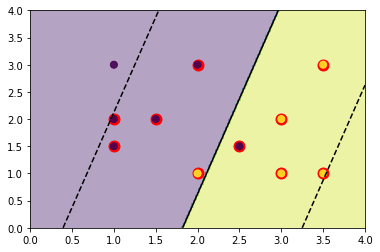

In [26]:
plt.contourf(X,Y,Z_scfac >0, alpha = 0.4)
plt.contour(X,Y,Z_scfac, colors=['k','k','k'], linestyles =['--','-','--'], levels =[-1,0,1])

plt.scatter(svc_scfac.support_vectors_[:,0], svc_scfac.support_vectors_[:,1], s = 120, facecolors = 'r')
# support_vectors arrays identifies the points which participated in the margin calculation

plt.scatter(x[:,0], x[:,1], c = y, s = 50, alpha=0.9)

## Nonlinear SVC - Polynomial

In [27]:
svc_poly = svm.SVC(kernel='poly', C = 1, degree = 3).fit(x,y)

# now the polynomial curve of 3rd degree will separate the area decision in two portions

C:\Users\Utsav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
Z_poly = svc_poly.decision_function(np.c_[X.ravel(), Y.ravel()])
Z_poly = Z_poly.reshape(X.shape)

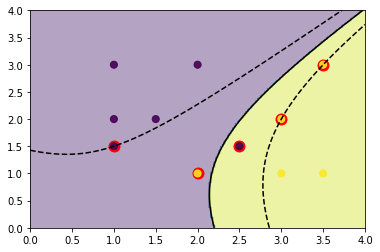

In [29]:
plt.contourf(X,Y,Z_poly >0, alpha = 0.4)
plt.contour(X,Y,Z_poly, colors=['k','k','k'], linestyles =['--','-','--'], levels =[-1,0,1])

plt.scatter(svc_poly.support_vectors_[:,0], svc_poly.support_vectors_[:,1], s = 120, facecolors = 'r')
# support_vectors arrays identifies the points which participated in the margin calculation

plt.scatter(x[:,0], x[:,1], c = y, s = 50, alpha=0.9)

## Nonlinear SVC - Radial Basis Function (RBF)

In [30]:
svc_rbf = svm.SVC(kernel='rbf', C = 1, gamma = 3).fit(x,y)

# now the polynomial curve of 3rd degree will separate the area decision in two portions

In [31]:
Z_rbf = svc_rbf.decision_function(np.c_[X.ravel(), Y.ravel()])
Z_rbf = Z_rbf.reshape(X.shape)

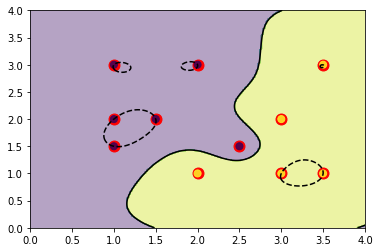

In [32]:
plt.contourf(X,Y,Z_rbf >0, alpha = 0.4)
plt.contour(X,Y,Z_rbf, colors=['k','k','k'], linestyles =['--','-','--'], levels =[-1,0,1])

plt.scatter(svc_rbf.support_vectors_[:,0], svc_rbf.support_vectors_[:,1], s = 120, facecolors = 'r')
# support_vectors arrays identifies the points which participated in the margin calculation

plt.scatter(x[:,0], x[:,1], c = y, s = 50, alpha=0.9)

## SVC - Iris Dataset - Linear Decision Boundary

In [33]:
from sklearn import datasets

In [34]:
iris = datasets.load_iris()

In [35]:
x = iris.data[:,:2]

In [36]:
y = iris.target

In [37]:
h = 0.5

In [38]:
svc_iris = svm.SVC(kernel = 'linear', C = 1.0).fit(x,y)

In [39]:
svc_iris

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
x_min, x_max = x[:,0].min()-h, x[:,0].max()+h
y_min, y_max = x[:,1].min()-h, x[:,1].max()+h

In [41]:
h = 0.02

In [42]:
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [43]:
Z_iris = svc_iris.predict(np.c_[X.ravel(), Y.ravel()])
Z_iris = Z_iris.reshape(X.shape)

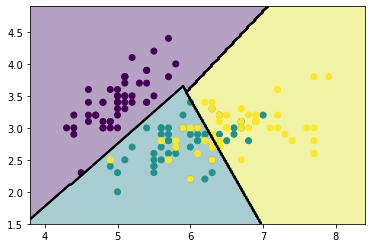

In [44]:
plt.contourf(X,Y,Z_iris, alpha = 0.4)
plt.contour(X,Y,Z_iris,colors = 'k')
plt.scatter(x[:,0], x[:,1], c = y)

In [45]:
# the decision area is split into three different portions

## SVC - Iris Dataset - Polynomial Kernel

In [46]:
h = 0.5

In [47]:
svc_iris = svm.SVC(kernel = 'poly', C = 1.0, degree = 3).fit(x,y)

C:\Users\Utsav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
svc_iris

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
x_min, x_max = x[:,0].min()-h, x[:,0].max()+h
y_min, y_max = x[:,1].min()-h, x[:,1].max()+h

In [50]:
h = 0.02

In [51]:
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [52]:
Z_iris = svc_iris.predict(np.c_[X.ravel(), Y.ravel()])
Z_iris = Z_iris.reshape(X.shape)

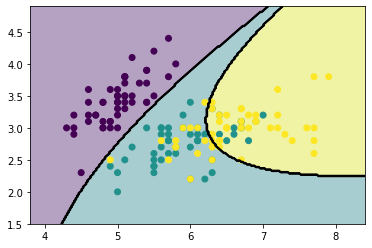

In [53]:
plt.contourf(X,Y,Z_iris, alpha = 0.4)
plt.contour(X,Y,Z_iris,colors = 'k')
plt.scatter(x[:,0], x[:,1], c = y)

## SVC - Iris Dataset - RBF Kernel

In [54]:
h = 0.5

In [55]:
svc_iris = svm.SVC(kernel = 'rbf', C = 1.0, gamma = 3).fit(x,y)

In [56]:
svc_iris

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [57]:
x_min, x_max = x[:,0].min()-h, x[:,0].max()+h
y_min, y_max = x[:,1].min()-h, x[:,1].max()+h

In [58]:
h = 0.02

In [59]:
X, Y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [60]:
Z_iris = svc_iris.predict(np.c_[X.ravel(), Y.ravel()])
Z_iris = Z_iris.reshape(X.shape)

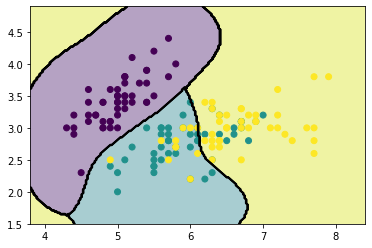

In [61]:
plt.contourf(X,Y,Z_iris, alpha = 0.4)
plt.contour(X,Y,Z_iris,colors = 'k')
plt.scatter(x[:,0], x[:,1], c = y)